
__Partendo da questo dataframe su kaggle__

 https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data




1. Caricare i dati in un DataFrame

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("boston.csv")


2. Visualizzare le prime e le ultime cinque righe del DataFrame.


In [9]:
print("\nprime righe:\n", df.head())
print("\nultime righe:\n", df.tail())



prime righe:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

ultime righe:
         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0

3. Visualizzare il tipo di dati di ciascuna colonna.


In [3]:
print("\ntipi dati per colonna:\n", df.dtypes)



tipi dati per colonna:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


4. Calcolare statistiche descrittive di base per le colonne numeriche


In [4]:
print("\nstatistiche descrittive:\n", df.describe())



statistiche descrittive:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


5. visualizzare valori mancanti;


In [ ]:
print("\nvalori mancanti colonna:\n",df.isnull().sum())
#.any per T\F


valori mancanti per colonna:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


6. verificate se ci sono correlazioni


In [6]:
correlazioni = df.corr()
print("\nmatrice correlazione:\n", correlazioni)



matrice correlazione:
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B   

7. create un grafico a mappa di calore.

<Axes: >

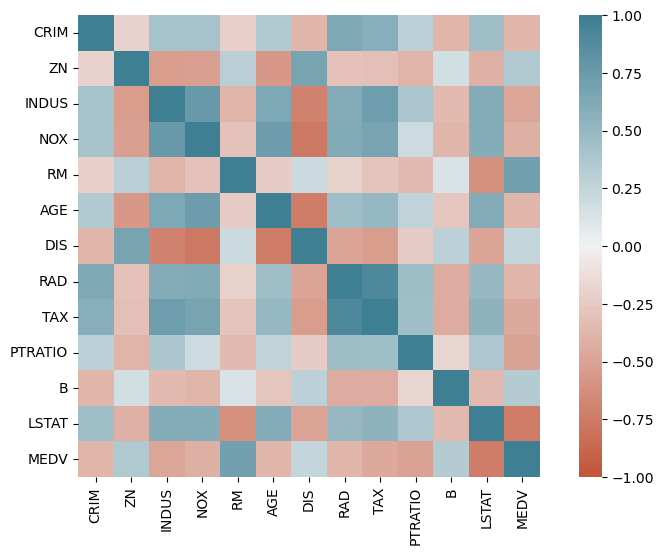

In [16]:

df = df.drop(columns=["CHAS"])

corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
corr,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True
)

__Partendo dallo stesso Dataframe sulle case scaricato in precedenza, calcolate la media dei prezzi delle case raggruppati per un variabile categorica creata sulla base delle stranze della casa e realizzate grafici esplicativi.__



In [41]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

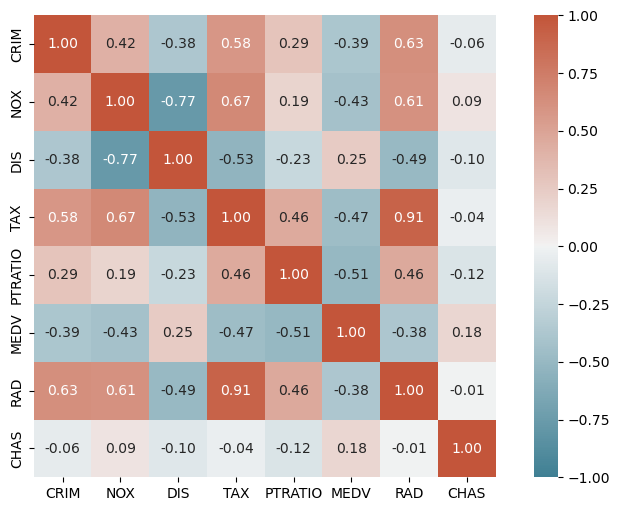

In [59]:
local_vars = ['CRIM', 'NOX', 'DIS', 'TAX', 'PTRATIO', 'MEDV', 'RAD', 'CHAS']
df_local = df[local_vars]


corr_local = df_local.corr()


# Plot della heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_local,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    annot=True, fmt=".2f",
    square=True
)

C:\Users\lauda\AppData\Local\Temp\ipykernel_30668\3237418736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=std_chas, x='CHAS', y='Deviazione_Standard', palette='magma')


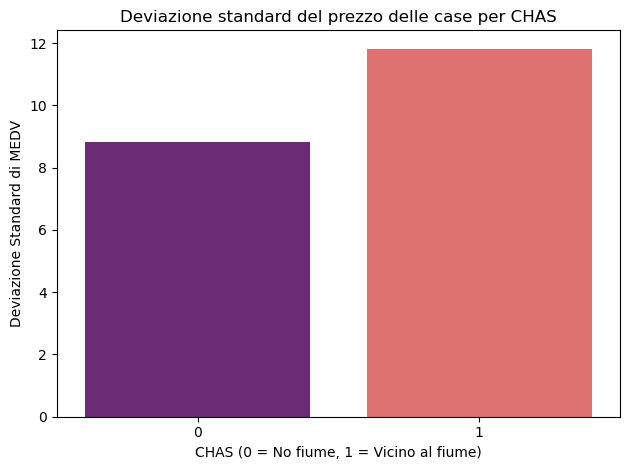

In [60]:
std_chas = df.groupby('CHAS')['MEDV'].std().reset_index()
std_chas.columns = ['CHAS', 'Deviazione_Standard']

sns.barplot(data=std_chas, x='CHAS', y='Deviazione_Standard', palette='magma')
plt.title("Deviazione standard del prezzo delle case per CHAS")
plt.xlabel("CHAS (0 = No fiume, 1 = Vicino al fiume)")
plt.ylabel("Deviazione Standard di MEDV")
plt.tight_layout()
plt.show()

In [62]:
condizioni = [
    df['DIS'] < 3,                   # Vicino
    (df['DIS'] >= 3) & (df['DIS'] < 6),  # Medio
    df['DIS'] >= 6                   # Lontano
]

categorie = ['Vicino', 'Medio', 'Lontano']

# Applichiamo le condizioni
df['DIS_cat'] = np.select(condizioni, categorie)

# Visualizza i primi risultati
print(df[['DIS', 'DIS_cat']].head(10))


      DIS  DIS_cat
0  4.0900    Medio
1  4.9671    Medio
2  4.9671    Medio
3  6.0622  Lontano
4  6.0622  Lontano
5  6.0622  Lontano
6  5.5605    Medio
7  5.9505    Medio
8  6.0821  Lontano
9  6.5921  Lontano


In [ ]:

statistiche_dis = df.groupby('DIS_cat')['MEDV'].agg(['mean', 'median', 'std']).round(2)
print(statistiche_dis)



Statistiche per categoria di distanza:
          mean  median    std
DIS_cat                      
Lontano  24.86    23.3   6.52
Medio    25.15    23.1   7.82
Vicino   19.73    17.8  10.14


<Axes: title={'center': 'Prezzo medio per distanza dal centro'}, xlabel='Distanza (DIS_cat)', ylabel='Prezzo MEDV'>

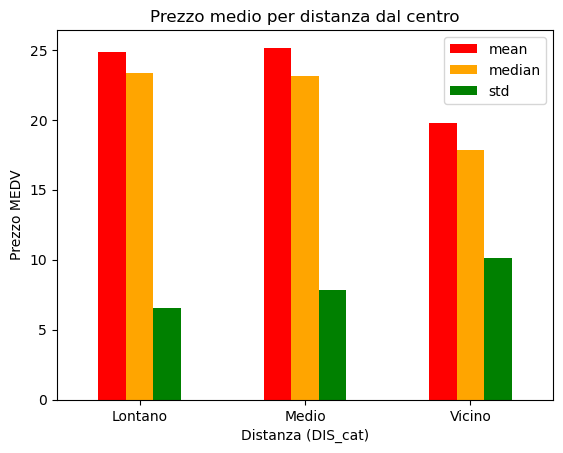

In [66]:
colori = ['red', 'orange', 'green']

statistiche_dis.plot(
    kind='bar',
    color=colori,
    title="Prezzo medio per distanza dal centro",
    ylabel="Prezzo MEDV",
    xlabel="Distanza (DIS_cat)",
    rot=0
)